# Computation of NPP signal to noise ratio in 30 year windows

### UKESM model output

Steps:
- Load the data
- Define the signal to noise function
- Using a 30 year moving window (for loop) to calculate the signal:noise ratio at each grid cell at each year

**Import packages**

In [3]:
!pwd

import numpy as np
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
import seaborn as sb
sb.set(style='ticks')


/home/users/train013/CMIP6_hackathon


**Import the pre-processed data**

In [4]:
### UKESM
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_UKESM1-0-LL_historical_r1i1p1f2_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_UKESM1-0-LL_ssp585_r1i1p1f2_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
lon = data.variables['ETOPO60X'][...]
lat = data.variables['ETOPO60Y'][...]
month = data.variables['time'][...]
years = np.arange(1850.5,2100.6,1)
ukesm_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

'''
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_ACCESS-ESM1-5_ssp585_r1i1p1f1_201501-230012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
access_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CanESM5_historical_r1i1p2f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CanESM5_ssp585_r1i1p2f1_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
canesm_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CESM2_historical_r4i1p1f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CESM2_ssp585_r4i1p1f1_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
cesm_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CNRM-ESM2-1_historical_r1i1p1f2_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CNRM-ESM2-1_ssp585_r1i1p1f2_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
cnrm_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_GFDL-CM4_historical_r1i1p1f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_GFDL-CM4_ssp585_ri1p1f1_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
gfdlcm4_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_GFDL-ESM4_historical_r1i1p1f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_GFDL-ESM4_ssp585_r1i1p1f1_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
gfdlesm4_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_IPSL-CM6A-LR_historical_r1i1p1f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_IPSL-CM6A-LR_ssp585_r1i1p1f1_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
ipsl_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_MIROC-ES2L_historical_r1i1p1f2_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_MIRIC-ES2L_ssp585_r1i1p1f2_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
miroc_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_MRI-ESM2-0_historical_r1i2p1f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_MRI-ESM2-0_ssp585_r1i2p1f1_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
mri_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_NorESM2-LM_historical_r1i1p1f1_185001-201412_yearmonths.nc')
hist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_NorESM2-LM_ssp585_r1i1p1f1_201501-210012_yearmonths.nc')
ssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
noresm_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)

print(np.shape(access_npp))
print(np.shape(canesm_npp))
print(np.shape(cesm_npp))
print(np.shape(cnrm_npp))
print(np.shape(gfdlcm4_npp))
print(np.shape(gfdlesm4_npp))
print(np.shape(ipsl_npp))
print(np.shape(miroc_npp))
print(np.shape(mri_npp))
print(np.shape(noresm_npp))
print(np.shape(ukesm_npp))


print(np.shape(lon))
print(np.shape(lat))
print(np.shape(month))
'''

"\ndata = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_185001-201412_yearmonths.nc')\nhist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1\ndata = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_ACCESS-ESM1-5_ssp585_r1i1p1f1_201501-230012_yearmonths.nc')\nssp585_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1\naccess_npp = np.ma.concatenate((hist_npp, ssp585_npp), axis=0)\n\ndata = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CanESM5_historical_r1i1p2f1_185001-201412_yearmonths.nc')\nhist_npp = data.variables['intpp'][...]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1\ndata = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_CanESM5_ssp585_r1i1p2f1_201501-210012_yearmonths.nc')\nssp585_npp = data.variables['intpp'][...]*86400*12  # convert

**Calculate multi-model mean**

In [5]:

print(np.shape(ukesm_npp))


(251, 12, 180, 360)


In [15]:
ukesm_npp_nh = np.ma.average(ukesm_npp[:,5:8,:,:], axis=1)
tmp = np.ma.zeros((251,3,180,360))
tmp[:,0,:,:] = ukesm_npp[:,11,:,:]
tmp[:,1,:,:] = ukesm_npp[:,0,:,:]
tmp[:,2,:,:] = ukesm_npp[:,1,:,:]
ukesm_npp_sh = np.ma.average(tmp, axis=1)

print(np.shape(ukesm_npp_nh))
print(np.shape(ukesm_npp_sh))

### past, present and future conditions for NH and SH summers
ukesm_npp_nh_past = np.ma.average(ukesm_npp_nh[1:51,:,:], axis=0)
ukesm_npp_sh_past = np.ma.average(ukesm_npp_sh[1:51,:,:], axis=0)
ukesm_npp_nh_hist = np.ma.average(ukesm_npp_nh[145:165,:,:], axis=0)
ukesm_npp_sh_hist = np.ma.average(ukesm_npp_sh[145:165,:,:], axis=0)
ukesm_npp_nh_futu = np.ma.average(ukesm_npp_nh[231:251,:,:], axis=0)
ukesm_npp_sh_futu = np.ma.average(ukesm_npp_sh[231:251,:,:], axis=0)


(251, 180, 360)
(251, 180, 360)


**make figure**

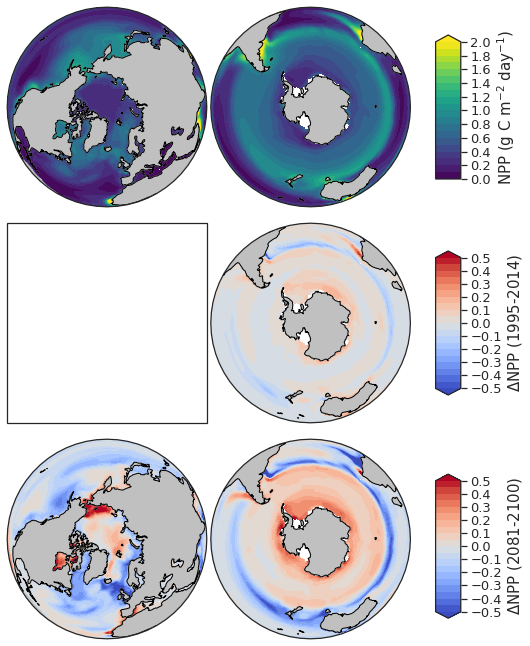

In [30]:
proj_nh = ccrs.Orthographic(central_longitude=-20.0, central_latitude=90.0, globe=None)
proj_sh = ccrs.Orthographic(central_longitude=-20.0, central_latitude=-90.0, globe=None)

levs1 = np.arange(0,21,1)*0.1
levs2 = np.arange(-50,51,5)*0.01

colmap1 = cm.viridis
colmap2 = cm.coolwarm

fstic = 13
fslab = 15

fig = plt.figure(figsize=(7,10))
gs = GridSpec(3,2)

ax1 = plt.subplot(gs[0,0], projection=proj_nh)
p1 = plt.contourf(lon, lat, ukesm_npp_nh_past, transform=ccrs.PlateCarree(), cmap=colmap1, levels=levs1, vmin=np.min(levs1), vmax=np.max(levs1), extend='max')
ax1.add_feature(cfeature.LAND, color='silver', zorder=2)
ax1.coastlines(zorder=2)

ax2 = plt.subplot(gs[0,1], projection=proj_sh)
p2 = plt.contourf(lon, lat, ukesm_npp_sh_past, transform=ccrs.PlateCarree(), cmap=colmap1, levels=levs1, vmin=np.min(levs1), vmax=np.max(levs1), extend='max')
ax2.add_feature(cfeature.LAND, color='silver', zorder=2)
ax2.coastlines(zorder=2)

ax3 = plt.subplot(gs[1,0], projection=proj_nh)
p3 = plt.contourf(lon, lat, ukesm_npp_nh_hist - ukesm_npp_nh_past, transform=ccrs.PlateCarree(), cmap=colmap2, levels=levs2, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')
ax3.add_feature(cfeature.LAND, color='silver', zorder=2)
ax3.coastlines(zorder=2)

ax4 = plt.subplot(gs[1,1], projection=proj_sh)
p4 = plt.contourf(lon, lat, ukesm_npp_sh_hist - ukesm_npp_sh_past, transform=ccrs.PlateCarree(), cmap=colmap2, levels=levs2, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')
ax4.add_feature(cfeature.LAND, color='silver', zorder=2)
ax4.coastlines(zorder=2)

ax5 = plt.subplot(gs[2,0], projection=proj_nh)
p5 = plt.contourf(lon, lat, ukesm_npp_nh_futu - ukesm_npp_nh_past, transform=ccrs.PlateCarree(), cmap=colmap2, levels=levs2, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')
ax5.add_feature(cfeature.LAND, color='silver', zorder=2)
ax5.coastlines(zorder=2)

ax6 = plt.subplot(gs[2,1], projection=proj_sh)
p6 = plt.contourf(lon, lat, ukesm_npp_sh_futu - ukesm_npp_sh_past, transform=ccrs.PlateCarree(), cmap=colmap2, levels=levs2, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')
ax6.add_feature(cfeature.LAND, color='silver', zorder=2)
ax6.coastlines(zorder=2)

plt.subplots_adjust(right=0.85, top=0.95, bottom=0.05, left=0.05, hspace=0.0, wspace=0.02)

cbax1 = fig.add_axes([0.9, 0.7, 0.05, 0.2])
cbar1 = plt.colorbar(p1, cax=cbax1, orientation='vertical', ticks=levs1[::2])
cbar1.ax.set_ylabel('NPP (g C m$^{-2}$ day$^{-1}$)', fontsize=fslab)
cbar1.ax.tick_params(labelsize=fstic)

cbax2 = fig.add_axes([0.9, 0.4, 0.05, 0.2])
cbar2 = plt.colorbar(p3, cax=cbax2, orientation='vertical', ticks=levs2[::2])
cbar2.ax.set_ylabel('$\Delta$NPP (1995-2014)', fontsize=fslab)
cbar2.ax.tick_params(labelsize=fstic)

cbax3 = fig.add_axes([0.9, 0.1, 0.05, 0.2])
cbar3 = plt.colorbar(p5, cax=cbax3, orientation='vertical', ticks=levs2[::2])
cbar3.ax.set_ylabel('$\Delta$NPP (2081-2100)', fontsize=fslab)
cbar3.ax.tick_params(labelsize=fstic)

fig.savefig('polarplots_intpp.png', dpi=300, bbox_inches='tight')

**Extract the signal:noise using the tern heatmap**

In [178]:
### select certain regions

mask = np.ma.getmask(s2n_npp_jan[:,:,:])

la1 = 125; la2 = 155
lo1 = 250; lo2 = 330
print("longitude =",lon[lo1],lon[lo2])
print("latitude =",lat[la1],lat[la2])
mask_NA = mask[:,la1:la2,lo1:lo2]
tern_density_NA = np.ma.masked_where(mask_NA[0,:,:], tern_density[la1:la2,lo1:lo2])
s2n_npp_jan_NA = np.ma.masked_where(mask_NA, s2n_npp_jan[:,la1:la2,lo1:lo2])
s2n_npp_feb_NA = np.ma.masked_where(mask_NA, s2n_npp_feb[:,la1:la2,lo1:lo2])
s2n_npp_mar_NA = np.ma.masked_where(mask_NA, s2n_npp_mar[:,la1:la2,lo1:lo2])
s2n_npp_apr_NA = np.ma.masked_where(mask_NA, s2n_npp_apr[:,la1:la2,lo1:lo2])
s2n_npp_may_NA = np.ma.masked_where(mask_NA, s2n_npp_may[:,la1:la2,lo1:lo2])
s2n_npp_jun_NA = np.ma.masked_where(mask_NA, s2n_npp_jun[:,la1:la2,lo1:lo2])
s2n_npp_jul_NA = np.ma.masked_where(mask_NA, s2n_npp_jul[:,la1:la2,lo1:lo2])
s2n_npp_aug_NA = np.ma.masked_where(mask_NA, s2n_npp_aug[:,la1:la2,lo1:lo2])
s2n_npp_sep_NA = np.ma.masked_where(mask_NA, s2n_npp_sep[:,la1:la2,lo1:lo2])
s2n_npp_oct_NA = np.ma.masked_where(mask_NA, s2n_npp_oct[:,la1:la2,lo1:lo2])
s2n_npp_nov_NA = np.ma.masked_where(mask_NA, s2n_npp_nov[:,la1:la2,lo1:lo2])
s2n_npp_dec_NA = np.ma.masked_where(mask_NA, s2n_npp_dec[:,la1:la2,lo1:lo2])

la1 = 50; la2 = 90
lo1 = 330; lo2 = 360
print("longitude =",lon[lo1],lon[lo2-1])
print("latitude =",lat[la1],lat[la2-1])
mask_BE = mask[:,la1:la2,lo1:lo2]
tern_density_BE = np.ma.masked_where(mask_BE[0,:,:], tern_density[la1:la2,lo1:lo2])
s2n_npp_jan_BE = np.ma.masked_where(mask_BE, s2n_npp_jan[:,la1:la2,lo1:lo2])
s2n_npp_feb_BE = np.ma.masked_where(mask_BE, s2n_npp_feb[:,la1:la2,lo1:lo2])
s2n_npp_mar_BE = np.ma.masked_where(mask_BE, s2n_npp_mar[:,la1:la2,lo1:lo2])
s2n_npp_apr_BE = np.ma.masked_where(mask_BE, s2n_npp_apr[:,la1:la2,lo1:lo2])
s2n_npp_may_BE = np.ma.masked_where(mask_BE, s2n_npp_may[:,la1:la2,lo1:lo2])
s2n_npp_jun_BE = np.ma.masked_where(mask_BE, s2n_npp_jun[:,la1:la2,lo1:lo2])
s2n_npp_jul_BE = np.ma.masked_where(mask_BE, s2n_npp_jul[:,la1:la2,lo1:lo2])
s2n_npp_aug_BE = np.ma.masked_where(mask_BE, s2n_npp_aug[:,la1:la2,lo1:lo2])
s2n_npp_sep_BE = np.ma.masked_where(mask_BE, s2n_npp_sep[:,la1:la2,lo1:lo2])
s2n_npp_oct_BE = np.ma.masked_where(mask_BE, s2n_npp_oct[:,la1:la2,lo1:lo2])
s2n_npp_nov_BE = np.ma.masked_where(mask_BE, s2n_npp_nov[:,la1:la2,lo1:lo2])
s2n_npp_dec_BE = np.ma.masked_where(mask_BE, s2n_npp_dec[:,la1:la2,lo1:lo2])

la1 = 35; la2 = 70
lo1 = 30; lo2 = 80
print("longitude =",lon[lo1],lon[lo2-1])
print("latitude =",lat[la1],lat[la2-1])
mask_AI = mask[:,la1:la2,lo1:lo2]
tern_density_AI = np.ma.masked_where(mask_AI[0,:,:], tern_density[la1:la2,lo1:lo2])
s2n_npp_jan_AI = np.ma.masked_where(mask_AI, s2n_npp_jan[:,la1:la2,lo1:lo2])
s2n_npp_feb_AI = np.ma.masked_where(mask_AI, s2n_npp_feb[:,la1:la2,lo1:lo2])
s2n_npp_mar_AI = np.ma.masked_where(mask_AI, s2n_npp_mar[:,la1:la2,lo1:lo2])
s2n_npp_apr_AI = np.ma.masked_where(mask_AI, s2n_npp_apr[:,la1:la2,lo1:lo2])
s2n_npp_may_AI = np.ma.masked_where(mask_AI, s2n_npp_may[:,la1:la2,lo1:lo2])
s2n_npp_jun_AI = np.ma.masked_where(mask_AI, s2n_npp_jun[:,la1:la2,lo1:lo2])
s2n_npp_jul_AI = np.ma.masked_where(mask_AI, s2n_npp_jul[:,la1:la2,lo1:lo2])
s2n_npp_aug_AI = np.ma.masked_where(mask_AI, s2n_npp_aug[:,la1:la2,lo1:lo2])
s2n_npp_sep_AI = np.ma.masked_where(mask_AI, s2n_npp_sep[:,la1:la2,lo1:lo2])
s2n_npp_oct_AI = np.ma.masked_where(mask_AI, s2n_npp_oct[:,la1:la2,lo1:lo2])
s2n_npp_nov_AI = np.ma.masked_where(mask_AI, s2n_npp_nov[:,la1:la2,lo1:lo2])
s2n_npp_dec_AI = np.ma.masked_where(mask_AI, s2n_npp_dec[:,la1:la2,lo1:lo2])

la1 = 0; la2 = 35
lo1 = 0; lo2 = 360
print("longitude =",lon[lo1],lon[lo2-1])
print("latitude =",lat[la1],lat[la2-1])
mask_SO = mask[:,la1:la2,lo1:lo2]
tern_density_SO = np.ma.masked_where(mask_SO[0,:,:], tern_density[la1:la2,lo1:lo2])
s2n_npp_jan_SO = np.ma.masked_where(mask_SO, s2n_npp_jan[:,la1:la2,lo1:lo2])
s2n_npp_feb_SO = np.ma.masked_where(mask_SO, s2n_npp_feb[:,la1:la2,lo1:lo2])
s2n_npp_mar_SO = np.ma.masked_where(mask_SO, s2n_npp_mar[:,la1:la2,lo1:lo2])
s2n_npp_apr_SO = np.ma.masked_where(mask_SO, s2n_npp_apr[:,la1:la2,lo1:lo2])
s2n_npp_may_SO = np.ma.masked_where(mask_SO, s2n_npp_may[:,la1:la2,lo1:lo2])
s2n_npp_jun_SO = np.ma.masked_where(mask_SO, s2n_npp_jun[:,la1:la2,lo1:lo2])
s2n_npp_jul_SO = np.ma.masked_where(mask_SO, s2n_npp_jul[:,la1:la2,lo1:lo2])
s2n_npp_aug_SO = np.ma.masked_where(mask_SO, s2n_npp_aug[:,la1:la2,lo1:lo2])
s2n_npp_sep_SO = np.ma.masked_where(mask_SO, s2n_npp_sep[:,la1:la2,lo1:lo2])
s2n_npp_oct_SO = np.ma.masked_where(mask_SO, s2n_npp_oct[:,la1:la2,lo1:lo2])
s2n_npp_nov_SO = np.ma.masked_where(mask_SO, s2n_npp_nov[:,la1:la2,lo1:lo2])
s2n_npp_dec_SO = np.ma.masked_where(mask_SO, s2n_npp_dec[:,la1:la2,lo1:lo2])

print(np.shape(s2n_npp_dec_SO))

longitude = 270.5 350.5
latitude = 35.5 65.5
longitude = 350.5 379.5
latitude = -39.5 -0.5
longitude = 50.5 99.5
latitude = -54.5 -20.5
longitude = 20.5 379.5
latitude = -89.5 -55.5
(251, 35, 360)


In [179]:
### weightings
def weighting(data,density):
    ww = density / np.ma.sum(density)
    tmp1 = data * ww
    data_w = np.ma.sum(tmp1)
    return data_w

s2n_npp_jan_NA_weighted = np.ma.zeros(len(s2n_npp_jan_NA[:,0,0]))
s2n_npp_feb_NA_weighted = np.ma.zeros(len(s2n_npp_jan_NA[:,0,0]))
s2n_npp_mar_NA_weighted = np.ma.zeros(len(s2n_npp_jan_NA[:,0,0]))
s2n_npp_apr_NA_weighted = np.ma.zeros(len(s2n_npp_jan_NA[:,0,0]))
s2n_npp_may_NA_weighted = np.ma.zeros(len(s2n_npp_jan_NA[:,0,0]))
s2n_npp_jun_NA_weighted = np.ma.zeros(len(s2n_npp_jan_NA[:,0,0]))
s2n_npp_jul_NA_weighted = np.ma.zeros(len(s2n_npp_jan_NA[:,0,0]))
s2n_npp_aug_NA_weighted = np.ma.zeros(len(s2n_npp_jan_NA[:,0,0]))
s2n_npp_sep_NA_weighted = np.ma.zeros(len(s2n_npp_jan_NA[:,0,0]))
s2n_npp_oct_NA_weighted = np.ma.zeros(len(s2n_npp_jan_NA[:,0,0]))
s2n_npp_nov_NA_weighted = np.ma.zeros(len(s2n_npp_jan_NA[:,0,0]))
s2n_npp_dec_NA_weighted = np.ma.zeros(len(s2n_npp_jan_NA[:,0,0]))

s2n_npp_jan_BE_weighted = np.ma.zeros(len(s2n_npp_jan_BE[:,0,0]))
s2n_npp_feb_BE_weighted = np.ma.zeros(len(s2n_npp_jan_BE[:,0,0]))
s2n_npp_mar_BE_weighted = np.ma.zeros(len(s2n_npp_jan_BE[:,0,0]))
s2n_npp_apr_BE_weighted = np.ma.zeros(len(s2n_npp_jan_BE[:,0,0]))
s2n_npp_may_BE_weighted = np.ma.zeros(len(s2n_npp_jan_BE[:,0,0]))
s2n_npp_jun_BE_weighted = np.ma.zeros(len(s2n_npp_jan_BE[:,0,0]))
s2n_npp_jul_BE_weighted = np.ma.zeros(len(s2n_npp_jan_BE[:,0,0]))
s2n_npp_aug_BE_weighted = np.ma.zeros(len(s2n_npp_jan_BE[:,0,0]))
s2n_npp_sep_BE_weighted = np.ma.zeros(len(s2n_npp_jan_BE[:,0,0]))
s2n_npp_oct_BE_weighted = np.ma.zeros(len(s2n_npp_jan_BE[:,0,0]))
s2n_npp_nov_BE_weighted = np.ma.zeros(len(s2n_npp_jan_BE[:,0,0]))
s2n_npp_dec_BE_weighted = np.ma.zeros(len(s2n_npp_jan_BE[:,0,0]))

s2n_npp_jan_AI_weighted = np.ma.zeros(len(s2n_npp_jan_AI[:,0,0]))
s2n_npp_feb_AI_weighted = np.ma.zeros(len(s2n_npp_jan_AI[:,0,0]))
s2n_npp_mar_AI_weighted = np.ma.zeros(len(s2n_npp_jan_AI[:,0,0]))
s2n_npp_apr_AI_weighted = np.ma.zeros(len(s2n_npp_jan_AI[:,0,0]))
s2n_npp_may_AI_weighted = np.ma.zeros(len(s2n_npp_jan_AI[:,0,0]))
s2n_npp_jun_AI_weighted = np.ma.zeros(len(s2n_npp_jan_AI[:,0,0]))
s2n_npp_jul_AI_weighted = np.ma.zeros(len(s2n_npp_jan_AI[:,0,0]))
s2n_npp_aug_AI_weighted = np.ma.zeros(len(s2n_npp_jan_AI[:,0,0]))
s2n_npp_sep_AI_weighted = np.ma.zeros(len(s2n_npp_jan_AI[:,0,0]))
s2n_npp_oct_AI_weighted = np.ma.zeros(len(s2n_npp_jan_AI[:,0,0]))
s2n_npp_nov_AI_weighted = np.ma.zeros(len(s2n_npp_jan_AI[:,0,0]))
s2n_npp_dec_AI_weighted = np.ma.zeros(len(s2n_npp_jan_AI[:,0,0]))

s2n_npp_jan_SO_weighted = np.ma.zeros(len(s2n_npp_jan_SO[:,0,0]))
s2n_npp_feb_SO_weighted = np.ma.zeros(len(s2n_npp_jan_SO[:,0,0]))
s2n_npp_mar_SO_weighted = np.ma.zeros(len(s2n_npp_jan_SO[:,0,0]))
s2n_npp_apr_SO_weighted = np.ma.zeros(len(s2n_npp_jan_SO[:,0,0]))
s2n_npp_may_SO_weighted = np.ma.zeros(len(s2n_npp_jan_SO[:,0,0]))
s2n_npp_jun_SO_weighted = np.ma.zeros(len(s2n_npp_jan_SO[:,0,0]))
s2n_npp_jul_SO_weighted = np.ma.zeros(len(s2n_npp_jan_SO[:,0,0]))
s2n_npp_aug_SO_weighted = np.ma.zeros(len(s2n_npp_jan_SO[:,0,0]))
s2n_npp_sep_SO_weighted = np.ma.zeros(len(s2n_npp_jan_SO[:,0,0]))
s2n_npp_oct_SO_weighted = np.ma.zeros(len(s2n_npp_jan_SO[:,0,0]))
s2n_npp_nov_SO_weighted = np.ma.zeros(len(s2n_npp_jan_SO[:,0,0]))
s2n_npp_dec_SO_weighted = np.ma.zeros(len(s2n_npp_jan_SO[:,0,0]))


print(len(s2n_npp_jan_NA_weighted))


for yr in np.arange(len(s2n_npp_jan_NA[:,0,0])):
    s2n_npp_jan_NA_weighted[yr] = weighting(s2n_npp_jan_NA[yr,:,:], tern_density_NA)
    s2n_npp_feb_NA_weighted[yr] = weighting(s2n_npp_feb_NA[yr,:,:], tern_density_NA)
    s2n_npp_mar_NA_weighted[yr] = weighting(s2n_npp_mar_NA[yr,:,:], tern_density_NA)
    s2n_npp_apr_NA_weighted[yr] = weighting(s2n_npp_apr_NA[yr,:,:], tern_density_NA)
    s2n_npp_may_NA_weighted[yr] = weighting(s2n_npp_may_NA[yr,:,:], tern_density_NA)
    s2n_npp_jun_NA_weighted[yr] = weighting(s2n_npp_jun_NA[yr,:,:], tern_density_NA)
    s2n_npp_jul_NA_weighted[yr] = weighting(s2n_npp_jul_NA[yr,:,:], tern_density_NA)
    s2n_npp_aug_NA_weighted[yr] = weighting(s2n_npp_aug_NA[yr,:,:], tern_density_NA)
    s2n_npp_sep_NA_weighted[yr] = weighting(s2n_npp_sep_NA[yr,:,:], tern_density_NA)
    s2n_npp_oct_NA_weighted[yr] = weighting(s2n_npp_oct_NA[yr,:,:], tern_density_NA)
    s2n_npp_nov_NA_weighted[yr] = weighting(s2n_npp_nov_NA[yr,:,:], tern_density_NA)
    s2n_npp_dec_NA_weighted[yr] = weighting(s2n_npp_dec_NA[yr,:,:], tern_density_NA)
    
    s2n_npp_jan_BE_weighted[yr] = weighting(s2n_npp_jan_BE[yr,:,:], tern_density_BE)
    s2n_npp_feb_BE_weighted[yr] = weighting(s2n_npp_feb_BE[yr,:,:], tern_density_BE)
    s2n_npp_mar_BE_weighted[yr] = weighting(s2n_npp_mar_BE[yr,:,:], tern_density_BE)
    s2n_npp_apr_BE_weighted[yr] = weighting(s2n_npp_apr_BE[yr,:,:], tern_density_BE)
    s2n_npp_may_BE_weighted[yr] = weighting(s2n_npp_may_BE[yr,:,:], tern_density_BE)
    s2n_npp_jun_BE_weighted[yr] = weighting(s2n_npp_jun_BE[yr,:,:], tern_density_BE)
    s2n_npp_jul_BE_weighted[yr] = weighting(s2n_npp_jul_BE[yr,:,:], tern_density_BE)
    s2n_npp_aug_BE_weighted[yr] = weighting(s2n_npp_aug_BE[yr,:,:], tern_density_BE)
    s2n_npp_sep_BE_weighted[yr] = weighting(s2n_npp_sep_BE[yr,:,:], tern_density_BE)
    s2n_npp_oct_BE_weighted[yr] = weighting(s2n_npp_oct_BE[yr,:,:], tern_density_BE)
    s2n_npp_nov_BE_weighted[yr] = weighting(s2n_npp_nov_BE[yr,:,:], tern_density_BE)
    s2n_npp_dec_BE_weighted[yr] = weighting(s2n_npp_dec_BE[yr,:,:], tern_density_BE)
    
    s2n_npp_jan_AI_weighted[yr] = weighting(s2n_npp_jan_AI[yr,:,:], tern_density_AI)
    s2n_npp_feb_AI_weighted[yr] = weighting(s2n_npp_feb_AI[yr,:,:], tern_density_AI)
    s2n_npp_mar_AI_weighted[yr] = weighting(s2n_npp_mar_AI[yr,:,:], tern_density_AI)
    s2n_npp_apr_AI_weighted[yr] = weighting(s2n_npp_apr_AI[yr,:,:], tern_density_AI)
    s2n_npp_may_AI_weighted[yr] = weighting(s2n_npp_may_AI[yr,:,:], tern_density_AI)
    s2n_npp_jun_AI_weighted[yr] = weighting(s2n_npp_jun_AI[yr,:,:], tern_density_AI)
    s2n_npp_jul_AI_weighted[yr] = weighting(s2n_npp_jul_AI[yr,:,:], tern_density_AI)
    s2n_npp_aug_AI_weighted[yr] = weighting(s2n_npp_aug_AI[yr,:,:], tern_density_AI)
    s2n_npp_sep_AI_weighted[yr] = weighting(s2n_npp_sep_AI[yr,:,:], tern_density_AI)
    s2n_npp_oct_AI_weighted[yr] = weighting(s2n_npp_oct_AI[yr,:,:], tern_density_AI)
    s2n_npp_nov_AI_weighted[yr] = weighting(s2n_npp_nov_AI[yr,:,:], tern_density_AI)
    s2n_npp_dec_AI_weighted[yr] = weighting(s2n_npp_dec_AI[yr,:,:], tern_density_AI)
    
    s2n_npp_jan_SO_weighted[yr] = weighting(s2n_npp_jan_SO[yr,:,:], tern_density_SO)
    s2n_npp_feb_SO_weighted[yr] = weighting(s2n_npp_feb_SO[yr,:,:], tern_density_SO)
    s2n_npp_mar_SO_weighted[yr] = weighting(s2n_npp_mar_SO[yr,:,:], tern_density_SO)
    s2n_npp_apr_SO_weighted[yr] = weighting(s2n_npp_apr_SO[yr,:,:], tern_density_SO)
    s2n_npp_may_SO_weighted[yr] = weighting(s2n_npp_may_SO[yr,:,:], tern_density_SO)
    s2n_npp_jun_SO_weighted[yr] = weighting(s2n_npp_jun_SO[yr,:,:], tern_density_SO)
    s2n_npp_jul_SO_weighted[yr] = weighting(s2n_npp_jul_SO[yr,:,:], tern_density_SO)
    s2n_npp_aug_SO_weighted[yr] = weighting(s2n_npp_aug_SO[yr,:,:], tern_density_SO)
    s2n_npp_sep_SO_weighted[yr] = weighting(s2n_npp_sep_SO[yr,:,:], tern_density_SO)
    s2n_npp_oct_SO_weighted[yr] = weighting(s2n_npp_oct_SO[yr,:,:], tern_density_SO)
    s2n_npp_nov_SO_weighted[yr] = weighting(s2n_npp_nov_SO[yr,:,:], tern_density_SO)
    s2n_npp_dec_SO_weighted[yr] = weighting(s2n_npp_dec_SO[yr,:,:], tern_density_SO)


### put it all together in easy to use arrays
s2n_npp_NA_weighted = np.vstack((s2n_npp_jan_NA_weighted, s2n_npp_feb_NA_weighted, s2n_npp_mar_NA_weighted, 
                                 s2n_npp_apr_NA_weighted, s2n_npp_may_NA_weighted, s2n_npp_jun_NA_weighted, 
                                 s2n_npp_jul_NA_weighted, s2n_npp_aug_NA_weighted, s2n_npp_sep_NA_weighted, 
                                 s2n_npp_oct_NA_weighted, s2n_npp_nov_NA_weighted, s2n_npp_dec_NA_weighted))
s2n_npp_BE_weighted = np.vstack((s2n_npp_jan_BE_weighted, s2n_npp_feb_BE_weighted, s2n_npp_mar_BE_weighted,
                                 s2n_npp_apr_BE_weighted, s2n_npp_may_BE_weighted, s2n_npp_jun_BE_weighted,
                                 s2n_npp_jul_BE_weighted, s2n_npp_aug_BE_weighted, s2n_npp_sep_BE_weighted,
                                 s2n_npp_oct_BE_weighted, s2n_npp_nov_BE_weighted, s2n_npp_dec_BE_weighted))
s2n_npp_AI_weighted = np.vstack((s2n_npp_jan_AI_weighted, s2n_npp_feb_AI_weighted, s2n_npp_mar_AI_weighted, 
                                 s2n_npp_apr_AI_weighted, s2n_npp_may_AI_weighted, s2n_npp_jun_AI_weighted, 
                                 s2n_npp_jul_AI_weighted, s2n_npp_aug_AI_weighted, s2n_npp_sep_AI_weighted, 
                                 s2n_npp_oct_AI_weighted, s2n_npp_nov_AI_weighted, s2n_npp_dec_AI_weighted))
s2n_npp_SO_weighted = np.vstack((s2n_npp_jan_SO_weighted, s2n_npp_feb_SO_weighted, s2n_npp_mar_SO_weighted, 
                                 s2n_npp_apr_SO_weighted, s2n_npp_may_SO_weighted, s2n_npp_jun_SO_weighted, 
                                 s2n_npp_jul_SO_weighted, s2n_npp_aug_SO_weighted, s2n_npp_sep_SO_weighted, 
                                 s2n_npp_oct_SO_weighted, s2n_npp_nov_SO_weighted, s2n_npp_dec_SO_weighted))
print(np.shape(s2n_npp_NA_weighted))
print(np.shape(s2n_npp_BE_weighted))
print(np.shape(s2n_npp_AI_weighted))
print(np.shape(s2n_npp_SO_weighted))


251
(12, 251)
(12, 251)
(12, 251)
(12, 251)


In [ ]:
xxx

**Plot results**

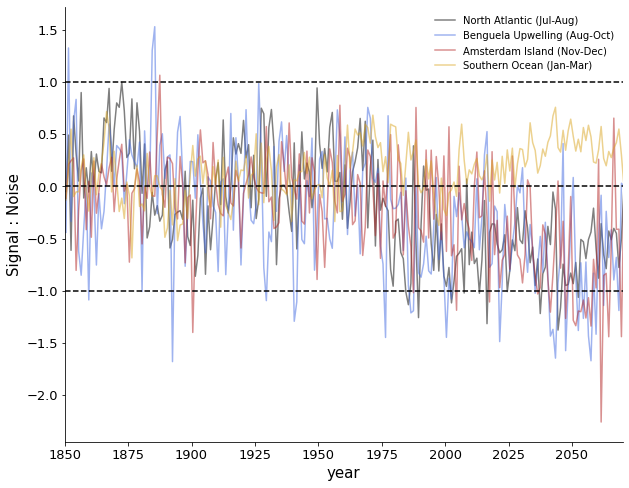

In [182]:
fstic = 13
fslab = 15
alf = [0.25,0.25,0.25,0.25]
ls = ['-','-','-','-']
lw = [1.5,1.5,1.5,1.5]
labs = ['North Atlantic (Jul-Aug)', 
        'Benguela Upwelling (Aug-Oct)',
        'Amsterdam Island (Nov-Dec)',
        'Southern Ocean (Jan-Mar)']
cols = ['k', 'royalblue', 'firebrick', 'goldenrod']

fig = plt.figure(figsize=(10,8))
gs = GridSpec(1,1)

la = 90
lo = 180

ax1 = plt.subplot(gs[0])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(labelsize=fstic)

plt.plot(years, np.average(s2n_npp_NA_weighted[6:8,:],axis=0), color=cols[0], label=labs[0], linewidth=lw[0], alpha=alf[0], linestyle=ls[0])
plt.plot(years, np.average(s2n_npp_BE_weighted[7:10,:],axis=0), color=cols[1], label=labs[1], linewidth=lw[1], alpha=alf[1], linestyle=ls[1])
plt.plot(years, np.average(s2n_npp_AI_weighted[10:12,:],axis=0), color=cols[2], label=labs[2], linewidth=lw[2], alpha=alf[2], linestyle=ls[2])
plt.plot(years, np.average(s2n_npp_SO_weighted[0:4,:],axis=0), color=cols[3], label=labs[3], linewidth=lw[3], alpha=alf[3], linestyle=ls[3])

plt.plot((1850,2100),(0,0),'k--')
plt.plot((1850,2100),(-1,-1),'k--')
plt.plot((1850,2100),(1,1),'k--')

plt.ylabel('Signal : Noise', fontsize=fslab)
plt.xlabel('year', fontsize=fslab)
plt.xlim(1850,2070)

plt.legend(frameon=False, loc='upper right', ncol=1)

fig.savefig('UKESMintpp_Signal2Noise_TernForagingRegions.png', dpi=300, bbox_inches='tight')